In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [355]:
afolu_original_file_energy = pd.read_csv("Agriculture_Forestry_and_Other_Land_Use_data.csv")

In [356]:
# Filter the DataFrame to keep only rows where 'Gas' is equal to 'CO2e (t) GWP-AR2'
filtered_df = afolu_original_file_energy[afolu_original_file_energy['Gas'] == 'CO2e (t) GWP-AR2']

# Save the filtered DataFrame to a new CSV file
output_file_name = 'afolu_filtered_CO2e_GWP_AR2.csv'
filtered_df.to_csv(output_file_name, index=False)

print(f"Filtered data saved to {output_file_name}")


Filtered data saved to afolu_filtered_CO2e_GWP_AR2.csv


In [357]:
afolu_filtered_gwp_ar2 = pd.read_csv("afolu_filtered_CO2e_GWP_AR2.csv")

In [358]:
afolu_filtered_gwp_ar2

,Level 1,Level 2,Level 3,Level 4,Level 5,Level 6,Level 7,Emission / Removal / Bunker,Gas,State,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,"Agriculture, Forestry and Other Land Use",Aggregate Sources and non-CO2 emissions source...,Rice Cultivation,Direct,Vegetal,Continous Flooding,NaN,Emissions,CO2e (t) GWP-AR2,Andaman & Nicobar Islands,...,0,0,0,0,0,0,0,0,0,0
1,"Agriculture, Forestry and Other Land Use",Aggregate Sources and non-CO2 emissions source...,Rice Cultivation,Direct,Vegetal,Continous Flooding,NaN,Emissions,CO2e (t) GWP-AR2,Andhra Pradesh,...,2605470,2607810,2806857,2408039,2896744,2789383,2452182,2724123,2684443,2440159
2,"Agriculture, Forestry and Other Land Use",Aggregate Sources and non-CO2 emissions source...,Rice Cultivation,Direct,Vegetal,Continous Flooding,NaN,Emissions,CO2e (t) GWP-AR2,Arunachal Pradesh,...,0,0,0,0,0,0,0,0,0,0
3,"Agriculture, Forestry and Other Land Use",Aggregate Sources and non-CO2 emissions source...,Rice Cultivation,Direct,Vegetal,Continous Flooding,NaN,Emissions,CO2e (t) GWP-AR2,Assam,...,173425,149834,200871,283023,236182,209728,205679,205421,205241,203396
4,"Agriculture, Forestry and Other Land Use",Aggregate Sources and non-CO2 emissions source...,Rice Cultivation,Direct,Vegetal,Continous Flooding,NaN,Emissions,CO2e (t) GWP-AR2,Bihar,...,2752547,2801265,2816587,2596319,2352730,2602537,2673042,2572907,2611169,2604343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,"Agriculture, Forestry and Other Land Use",Land,Other Land,Settlement Converted to Other Land,NaN,Settlement Converted to Other Land,NaN,Emissions,CO2e (t) GWP-AR2,Telangana,...,0,0,1,1,1,0,0,0,0,0
2192,"Agriculture, Forestry and Other Land Use",Land,Other Land,Settlement Converted to Other Land,NaN,Settlement Converted to Other Land,NaN,Emissions,CO2e (t) GWP-AR2,Tripura,...,0,0,2,2,2,0,0,0,0,0
2193,"Agriculture, Forestry and Other Land Use",Land,Other Land,Settlement Converted to Other Land,NaN,Settlement Converted to Other Land,NaN,Emissions,CO2e (t) GWP-AR2,Uttar Pradesh,...,0,0,0,0,0,0,0,0,0,0
2194,"Agriculture, Forestry and Other Land Use",Land,Other Land,Settlement Converted to Other Land,NaN,Settlement Converted to Other Land,NaN,Emissions,CO2e (t) GWP-AR2,Uttarakhand,...,0,0,0,0,0,0,0,0,0,0


In [418]:
import pandas as pd

# Assuming the data is loaded into a DataFrame called 'df'
# df = pd.read_csv('your_data.csv')  # If your data is in a CSV file, load it first

# For now, I'm assuming 'df' is already loaded with your data

# Select only the columns 'State' and emissions for 2010
# We're assuming that all the emissions columns are in a specific column like '2010'
emissions_2010 = afolu_filtered_gwp_ar2[['State', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

# Remove rows with missing emissions values for 2010
emissions_2010 = emissions_2010.dropna(subset=['2010'])

# Sum the emissions for all categories for each state for the year 2010
state_emissions_2010 = emissions_2010.groupby('State')['2010'].sum()

# Sort the states by total emissions in 2010 in descending order
top_states_2010 = state_emissions_2010.sort_values(ascending=False)

top_states_2010_afolu = top_states_2010

# Add a new column 'energy_values' with the same values as the sorted emissions
top_states_2010_afolu_df = top_states_2010.reset_index()  # Convert the Series to a DataFrame
top_states_2010_afolu_df.columns = ['State', 'afolu_values']  # Rename columns

# Save the DataFrame to a CSV file
top_states_2010_afolu_df.to_csv('top_states_2010_afolu.csv', index=False)

# Display a confirmation message
print("Data saved to 'top_states_2010_afolu.csv'.")

Data saved to 'top_states_2010_afolu.csv'.


In [359]:



# List of columns representing the years 2005 to 2015
year_columns = [str(year) for year in range(2005, 2016)]

# Dictionary to store results for each category
category_sums = {}

# Calculate the summation for each category in 'Level 1'
for category in afolu_filtered_gwp_ar2['Level 2'].unique():
    # Filter rows for the current category
    category_df = afolu_filtered_gwp_ar2[afolu_filtered_gwp_ar2['Level 2'] == category]
    
    # Sum emissions for each year
    category_sums[category] = category_df[year_columns].sum()

# Convert the dictionary to a DataFrame for easier display and export
category_sums_df = pd.DataFrame(category_sums, index=year_columns).transpose()

# Add a row for the final summation for all categories
category_sums_df.loc['Total'] = category_sums_df.sum()

# Display the results
print(category_sums_df)

# Save the results to a CSV file
category_sums_df.to_csv('afolu_yearly_emissions_by_category_level2_and_total.csv')
print("Yearly emissions by category and totals saved to 'afolu_yearly_emissions_by_category_level2_and_total.csv'")

                                                        2005      2006  \
Aggregate Sources and non-CO2 emissions sources... 125261695 127022523   
Livestock                                          219785211 225034639   
Land                                               -90196915 -90196915   
Total                                              254849990 261860247   

                                                        2007      2008  \
Aggregate Sources and non-CO2 emissions sources... 127341481 130421216   
Livestock                                          230280129 228950379   
Land                                               -90196915 -92074293   
Total                                              267424696 267297302   

                                                        2009      2010  \
Aggregate Sources and non-CO2 emissions sources... 128808800 132061013   
Livestock                                          227620629 226290879   
Land                                

In [360]:
afolu_yearly_emissions_by_category_level2_and_total = pd.read_csv('afolu_yearly_emissions_by_category_level2_and_total.csv')

In [361]:
# Rename the unnamed column (assuming it's the first column)
afolu_yearly_emissions_by_category_level2_and_total = afolu_yearly_emissions_by_category_level2_and_total.rename(columns={afolu_yearly_emissions_by_category_level2_and_total.columns[0]: 'Category'})
afolu_yearly_emissions_by_category_level2_and_total

,Category,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aggregate Sources and non-CO2 emissions source...,125261695,127022523,127341481,130421216,128808800,132061013,135810620,133196615,132494821,131719812,131556338
1,Livestock,219785211,225034639,230280129,228950379,227620629,226290879,224961129,223631379,224600518,226299184,228747253
2,Land,-90196915,-90196915,-90196915,-92074293,-92074293,-92074293,-90714783,-65092352,-65092352,-117181916,-117181916
3,Total,254849990,261860247,267424696,267297302,264355136,266277599,270056966,291735642,292002986,240837080,243121676


In [362]:
from matplotlib.ticker import FixedLocator, FixedFormatter

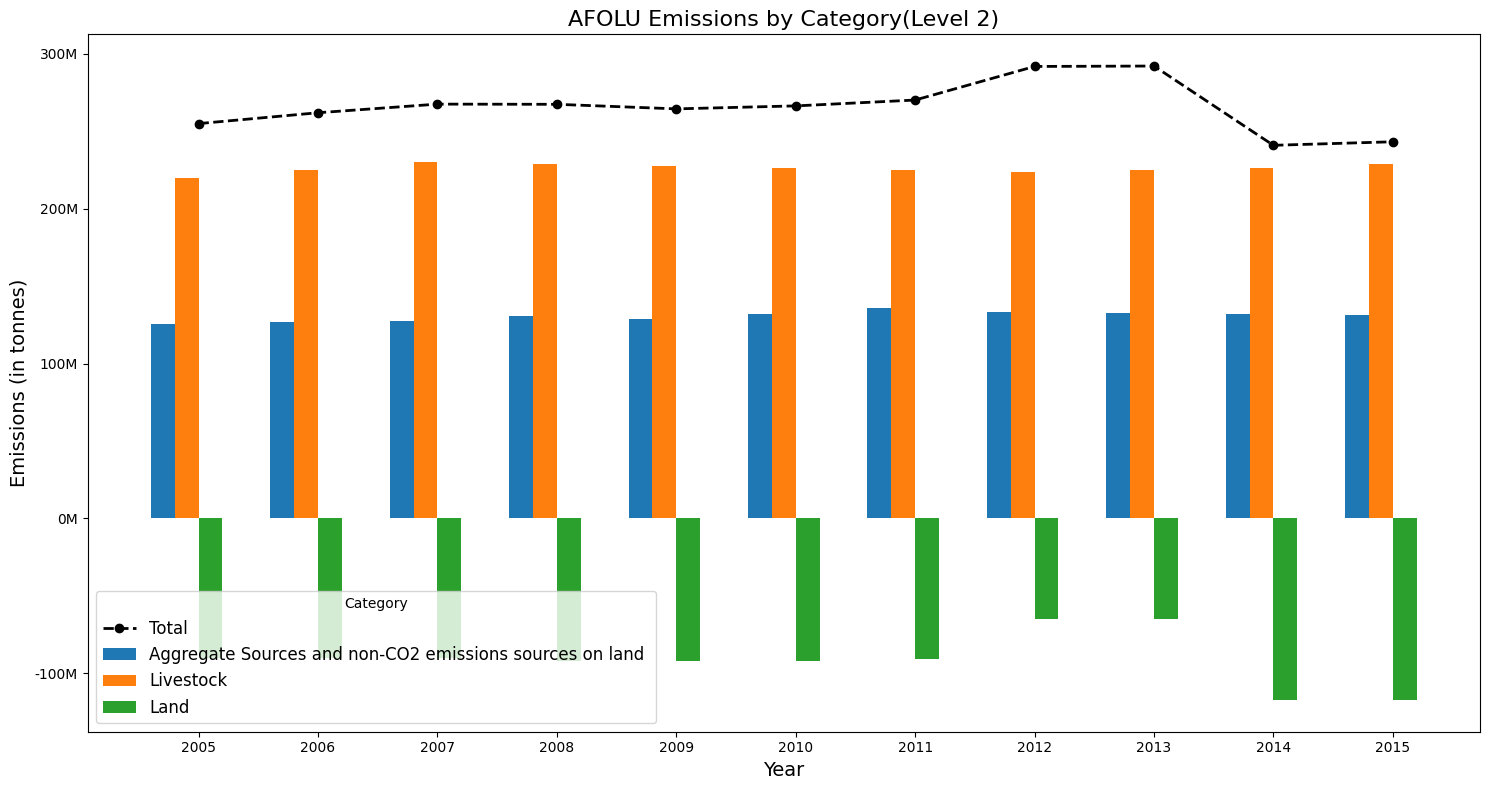

In [451]:
import matplotlib.pyplot as plt

# Remove the 'Total' row for category-based plotting
category_df = afolu_yearly_emissions_by_category_level2_and_total[
    afolu_yearly_emissions_by_category_level2_and_total['Category'] != 'Total'
]

# Extract the "Total" row for line plotting
total_emissions = afolu_yearly_emissions_by_category_level2_and_total[
    afolu_yearly_emissions_by_category_level2_and_total['Category'] == 'Total'
]

# List of years
years = [str(year) for year in range(2005, 2016)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Bar width
bar_width = 0.2
x_indexes = range(len(years))

# Iterate through each category and plot its bars
for i, category in enumerate(category_df['Category']):
    ax.bar(
        [x + i * bar_width for x in x_indexes],  # Offset bars for each category
        category_df.loc[category_df['Category'] == category, years].values.flatten(),
        width=bar_width,
        label=category
    )

# Plot the total emissions as a line
ax.plot(
    [x + 1.5 * bar_width for x in x_indexes],  # Align with the center of grouped bars
    total_emissions[years].values.flatten(),
    color='black',
    marker='o',
    linestyle='--',
    linewidth=2,
    label='Total'
)

# Customizations
ax.set_title("AFOLU Emissions by Category(Level 2)", fontsize=16)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Emissions (in tonnes)", fontsize=14)
ax.set_xticks([x + 1.5 * bar_width for x in x_indexes])  # Center labels
ax.set_xticklabels(years, rotation=0)  # Make the X-axis labels horizontal

# Automatically scale the y-axis based on data
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))  # Format as '100M', '200M', etc.

# Add legend
ax.legend(title="Category", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [366]:



# List of columns representing the years 2005 to 2015
year_columns = [str(year) for year in range(2005, 2016)]

# Dictionary to store results for each category
category_sums = {}

# Calculate the summation for each category in 'Level 1'
for category in afolu_filtered_gwp_ar2['Level 3'].unique():
    # Filter rows for the current category
    category_df = afolu_filtered_gwp_ar2[afolu_filtered_gwp_ar2['Level 3'] == category]
    
    # Sum emissions for each year
    category_sums[category] = category_df[year_columns].sum()

# Convert the dictionary to a DataFrame for easier display and export
category_sums_df = pd.DataFrame(category_sums, index=year_columns).transpose()

# Add a row for the final summation for all categories
category_sums_df.loc['Total'] = category_sums_df.sum()

# Display the results
print(category_sums_df)

# Save the results to a CSV file
category_sums_df.to_csv('afolu_yearly_emissions_by_category_level3_and_total.csv')
print("Yearly emissions by category and totals saved to 'afolu_yearly_emissions_by_category_level3_and_total.csv'")

                                    2005      2006      2007      2008  \
Rice Cultivation                70523716  71467840  71100104  72463149   
Biomass Burning in Cropland      5055017   5490903   5749656   5660718   
Agriculture Soils               44659458  45026705  45433045  47217072   
Enteric Fermentation           198842509 203632597 208422685 207212144   
Manure Management               20942702  21402042  21857444  21738235   
Forest Land                    -97973911 -97973911 -97973911 -97973911   
Biomass Burning in Forest Land   5023504   5037075   5058675   5080276   
Cropland                        -1462570  -1462570  -1462570   -621446   
Grassland                         583658    583658    583658    422919   
Settlements                       445457    445457    445457    467623   
Other Land                       8210451   8210451   8210451   5630522   
Total                          254849990 261860247 267424696 267297302   

                                    2

In [367]:
afolu_yearly_emissions_by_category_level3_and_total = pd.read_csv('afolu_yearly_emissions_by_category_level3_and_total.csv')

In [368]:
# Rename the unnamed column (assuming it's the first column)
afolu_yearly_emissions_by_category_level3_and_total = afolu_yearly_emissions_by_category_level3_and_total.rename(columns={afolu_yearly_emissions_by_category_level3_and_total.columns[0]: 'Category'})
afolu_yearly_emissions_by_category_level3_and_total

,Category,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Rice Cultivation,70523716,71467840,71100104,72463149,69378947,69399778,70227248,68449701,69888615,69457989,68143892
1,Biomass Burning in Cropland,5055017,5490903,5749656,5660718,5461727,5835875,6218162,6247740,6350801,6165942,6159394
2,Agriculture Soils,44659458,45026705,45433045,47217072,48868269,51705923,54224865,53337922,51073245,50868099,51979647
3,Enteric Fermentation,198842509,203632597,208422685,207212144,206001602,204791061,203580519,202369978,203237347,204764514,206970024
4,Manure Management,20942702,21402042,21857444,21738235,21619027,21499818,21380609,21261401,21363171,21534670,21777229
5,Forest Land,-97973911,-97973911,-97973911,-97973911,-97973911,-97973911,-97973911,-72351481,-72351481,-124441044,-124441044
6,Biomass Burning in Forest Land,5023504,5037075,5058675,5080276,5099856,5119437,5140345,5161252,5182160,5227783,5273405
7,Cropland,-1462570,-1462570,-1462570,-621446,-621446,-621446,-1324154,-1324154,-1324154,-1324154,-1324154
8,Grassland,583658,583658,583658,422919,422919,422919,656986,656986,656986,656986,656986
9,Settlements,445457,445457,445457,467623,467623,467623,492098,492098,492098,492098,492098


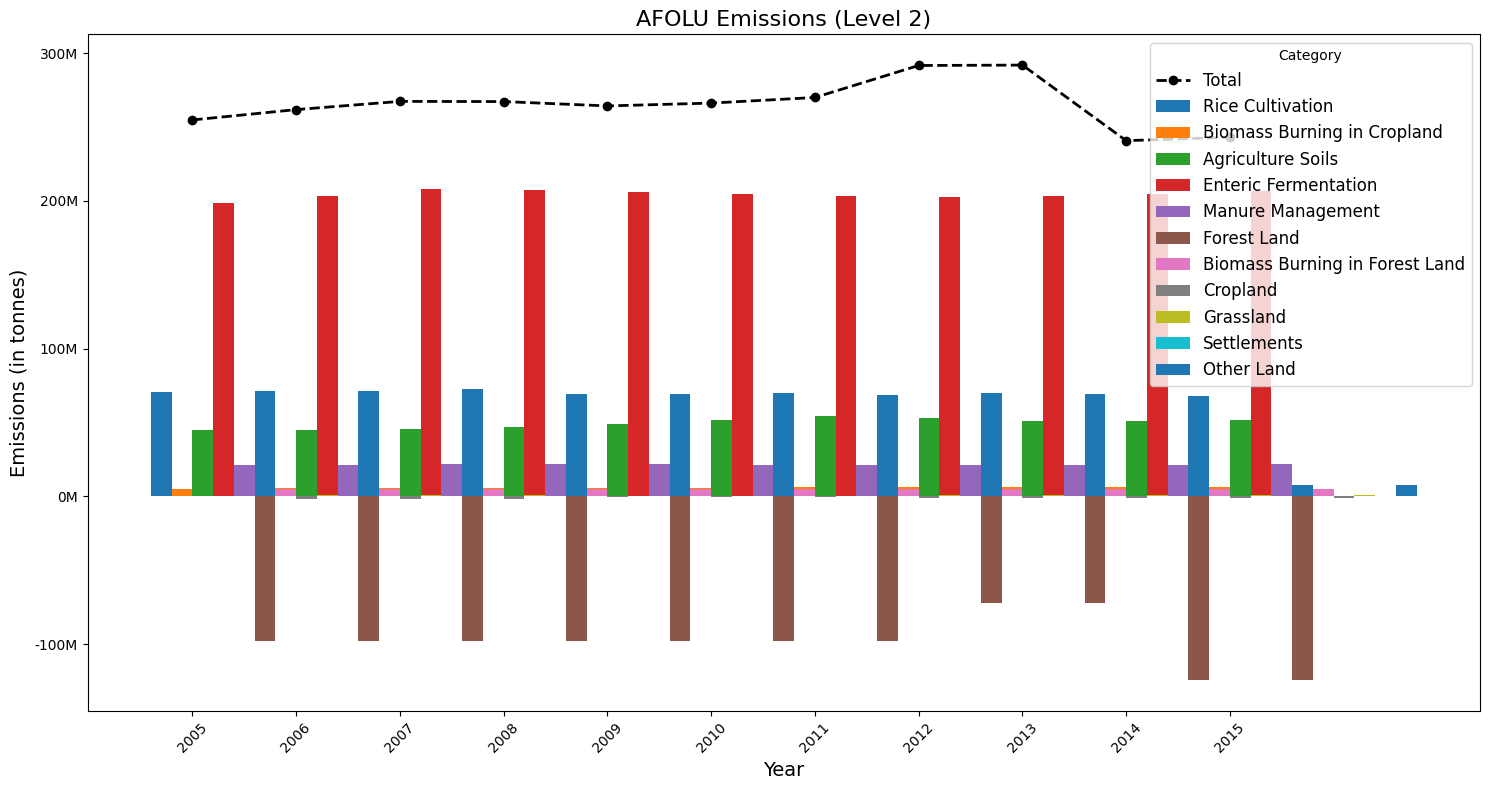

In [369]:
import matplotlib.pyplot as plt

# Remove the 'Total' row for category-based plotting
category_df = afolu_yearly_emissions_by_category_level3_and_total[
    afolu_yearly_emissions_by_category_level3_and_total['Category'] != 'Total'
]

# Extract the "Total" row for line plotting
total_emissions = afolu_yearly_emissions_by_category_level3_and_total[
    afolu_yearly_emissions_by_category_level3_and_total['Category'] == 'Total'
]

# List of years
years = [str(year) for year in range(2005, 2016)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Bar width
bar_width = 0.2
x_indexes = range(len(years))

# Iterate through each category and plot its bars
for i, category in enumerate(category_df['Category']):
    ax.bar(
        [x + i * bar_width for x in x_indexes],  # Offset bars for each category
        category_df.loc[category_df['Category'] == category, years].values.flatten(),
        width=bar_width,
        label=category
    )

# Plot the total emissions as a line
ax.plot(
    [x + 1.5 * bar_width for x in x_indexes],  # Align with the center of grouped bars
    total_emissions[years].values.flatten(),
    color='black',
    marker='o',
    linestyle='--',
    linewidth=2,
    label='Total'
)

# Customizations
ax.set_title("AFOLU Emissions (Level 2)", fontsize=16)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Emissions (in tonnes)", fontsize=14)
ax.set_xticks([x + 1.5 * bar_width for x in x_indexes])  # Center labels
ax.set_xticklabels(years, rotation=45)

# Automatically scale the y-axis based on data
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))  # Format as '100M', '200M', etc.

# Add legend
ax.legend(title="Category", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


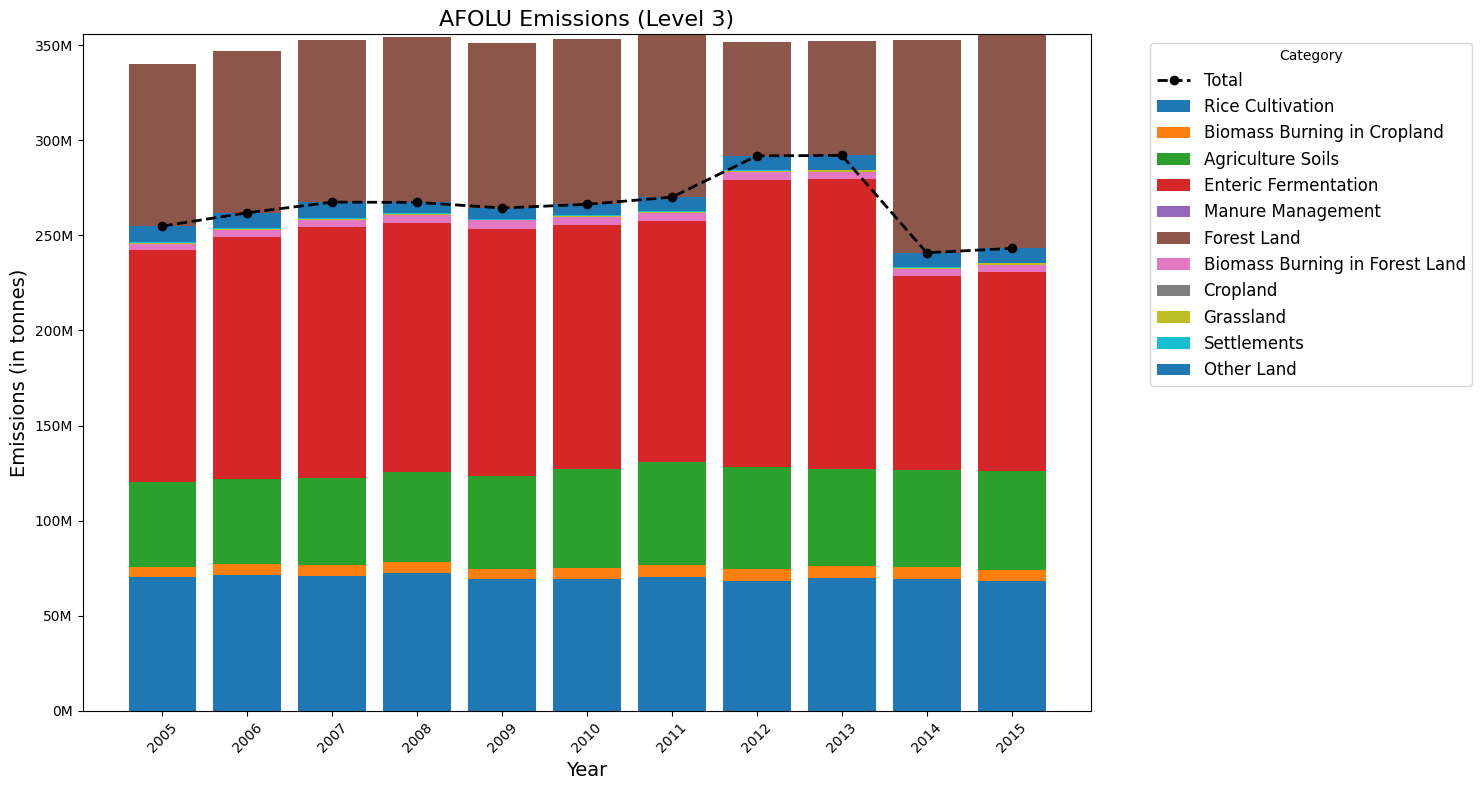

In [453]:
import matplotlib.pyplot as plt
import numpy as np

# Remove the 'Total' row for category-based plotting
category_df = afolu_yearly_emissions_by_category_level3_and_total[
    afolu_yearly_emissions_by_category_level3_and_total['Category'] != 'Total'
]

# Extract the "Total" row for line plotting
total_emissions = afolu_yearly_emissions_by_category_level3_and_total[
    afolu_yearly_emissions_by_category_level3_and_total['Category'] == 'Total'
]

# List of years
years = [str(year) for year in range(2005, 2016)]

# Prepare data for the stacked bar chart
category_data = category_df.set_index('Category')[years].T  # Transpose for easier stacking
categories = category_data.columns  # Extract the categories

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))

# Create stacked bar chart
bottom_values = np.zeros(len(years))  # To track cumulative bottoms for stacking

# Iterate through each category and stack the bars
for category in categories:
    ax.bar(
        years,
        category_data[category],
        bottom=bottom_values,  # Stack on top of previous category
        label=category
    )
    bottom_values += category_data[category]  # Update bottom values for the next stack

# Plot the total emissions as a line
total_emissions_data = total_emissions[years].values.flatten().astype(float)
ax.plot(
    years,
    total_emissions_data,
    color='black',
    marker='o',
    linestyle='--',
    linewidth=2,
    label='Total'
)

# Customizations
ax.set_title("AFOLU Emissions (Level 3)", fontsize=16)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Emissions (in tonnes)", fontsize=14)
ax.set_xticks(range(len(years)))  # Set ticks to match the years
ax.set_xticklabels(years, rotation=45)

# Automatically scale the y-axis based on data
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))  # Format as '100M', '200M', etc.

# Add legend and place it outside the plot
ax.legend(title="Category", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot with the legend outside
plt.tight_layout()
plt.show()


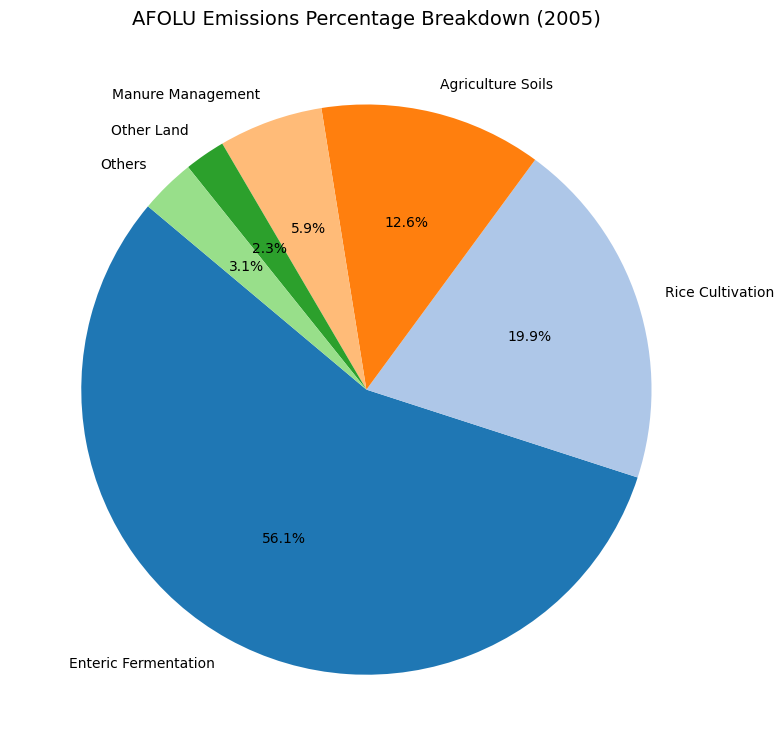

In [374]:
import matplotlib.pyplot as plt

# Extract data for the year 2005
year = "2005"
data_2005 = category_data.loc[year]

# Filter out negative values (removals or net reductions)
positive_data_2005 = data_2005[data_2005 > 0]

# Sort and extract the top 5 categories
top_5 = positive_data_2005.nlargest(5)

# Sum the remaining emissions as "Others"
others = positive_data_2005.sum() - top_5.sum()

# Add "Others" to the top 5 data
top_5["Others"] = others

# Plot pie chart
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust figure size as needed
ax.pie(
    top_5, 
    labels=top_5.index, 
    autopct='%1.1f%%',  # Show percentages
    startangle=140,     # Start angle for better appearance
    colors=plt.cm.tab20.colors[:len(top_5)]  # Use consistent category colors
)

# Title
ax.set_title(f"AFOLU Emissions Percentage Breakdown ({year})", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


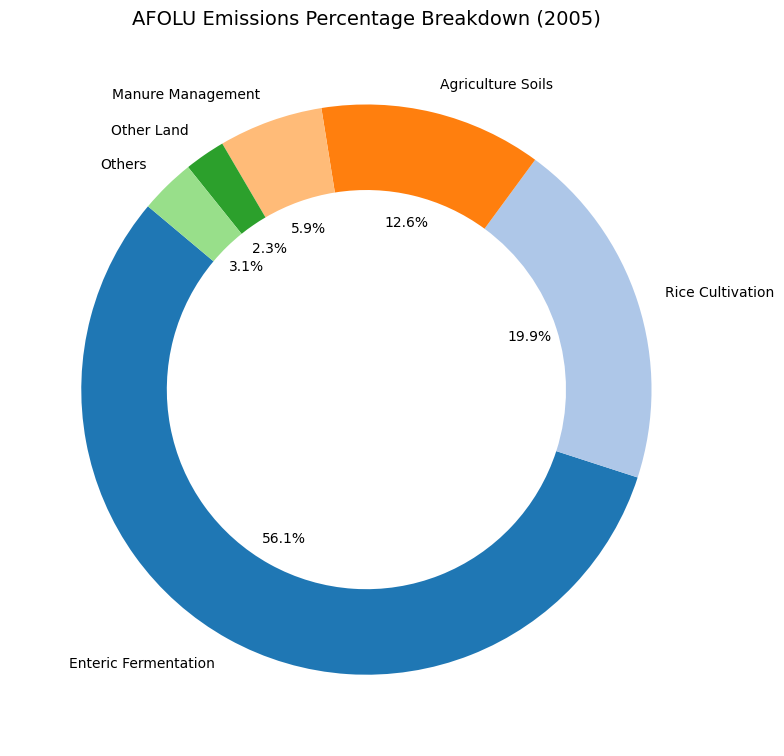

In [379]:
import matplotlib.pyplot as plt

# Extract data for the year 2005
year = "2005"
data_2005 = category_data.loc[year]

# Filter out negative values (removals or net reductions)
positive_data_2005 = data_2005[data_2005 > 0]

# Sort and extract the top 5 categories
top_5 = positive_data_2005.nlargest(5)

# Sum the remaining emissions as "Others"
others = positive_data_2005.sum() - top_5.sum()

# Add "Others" to the top 5 data
top_5["Others"] = others

# Plot donut chart
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust figure size as needed
ax.pie(
    top_5, 
    labels=top_5.index, 
    autopct=lambda pct: ('%1.1f%%' % pct) if pct > 2 else '',  # Show percentages conditionally
    startangle=140,     # Start angle for better appearance
    colors=plt.cm.tab20.colors[:len(top_5)],  # Use consistent category colors
    wedgeprops={'width': 0.3}  # Reduced width for the donut chart
)

# Title
ax.set_title(f"AFOLU Emissions Percentage Breakdown ({year})", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


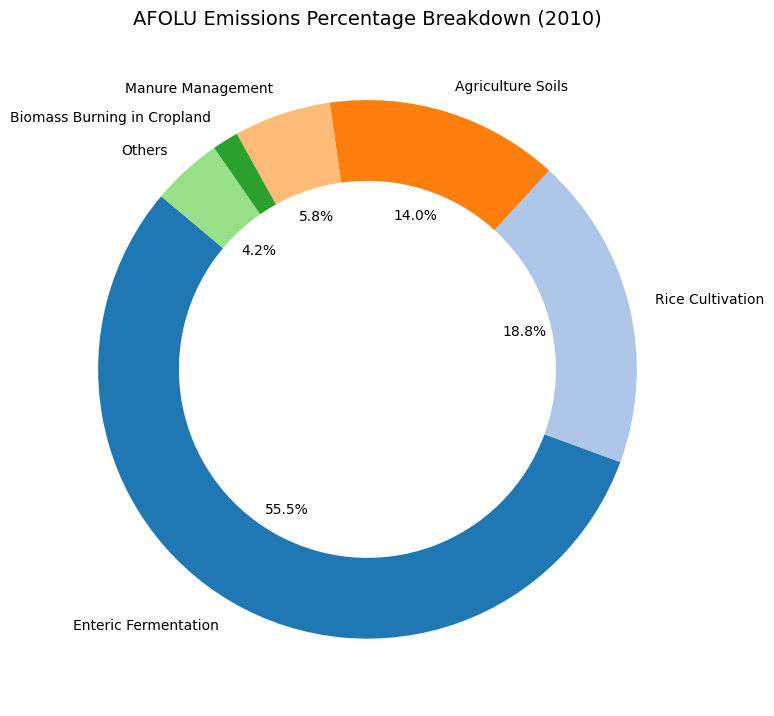

In [382]:
import matplotlib.pyplot as plt

# Extract data for the year 2005
year = "2010"
data_2010 = category_data.loc[year]

# Filter out negative values (removals or net reductions)
positive_data_2010 = data_2010[data_2010 > 0]

# Sort and extract the top 5 categories
top_5 = positive_data_2010.nlargest(5)

# Sum the remaining emissions as "Others"
others = positive_data_2005.sum() - top_5.sum()

# Add "Others" to the top 5 data
top_5["Others"] = others

# Plot donut chart
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust figure size as needed
ax.pie(
    top_5, 
    labels=top_5.index, 
    autopct=lambda pct: ('%1.1f%%' % pct) if pct > 2 else '',  # Show percentages conditionally
    startangle=140,     # Start angle for better appearance
    colors=plt.cm.tab20.colors[:len(top_5)],  # Use consistent category colors
    wedgeprops={'width': 0.3}  # Reduced width for the donut chart
)

# Title
ax.set_title(f"AFOLU Emissions Percentage Breakdown ({year})", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


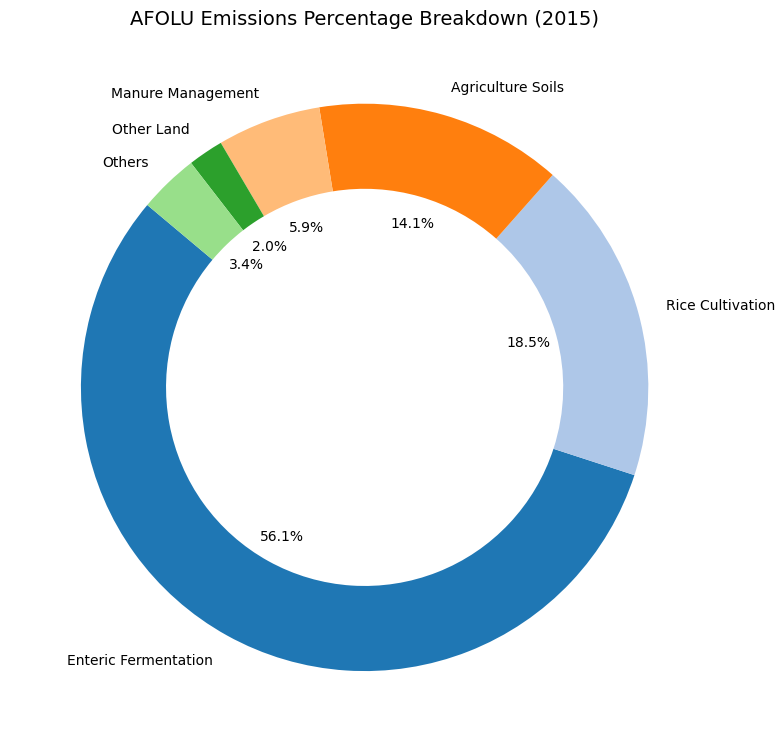

In [383]:
import matplotlib.pyplot as plt

# Extract data for the year 2005
year = "2015"
data_2015 = category_data.loc[year]

# Filter out negative values (removals or net reductions)
positive_data_2015 = data_2015[data_2015 > 0]

# Sort and extract the top 5 categories
top_5 = positive_data_2015.nlargest(5)

# Sum the remaining emissions as "Others"
others = positive_data_2015.sum() - top_5.sum()

# Add "Others" to the top 5 data
top_5["Others"] = others

# Plot donut chart
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust figure size as needed
ax.pie(
    top_5, 
    labels=top_5.index, 
    autopct=lambda pct: ('%1.1f%%' % pct) if pct > 2 else '',  # Show percentages conditionally
    startangle=140,     # Start angle for better appearance
    colors=plt.cm.tab20.colors[:len(top_5)],  # Use consistent category colors
    wedgeprops={'width': 0.3}  # Reduced width for the donut chart
)

# Title
ax.set_title(f"AFOLU Emissions Percentage Breakdown ({year})", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()
